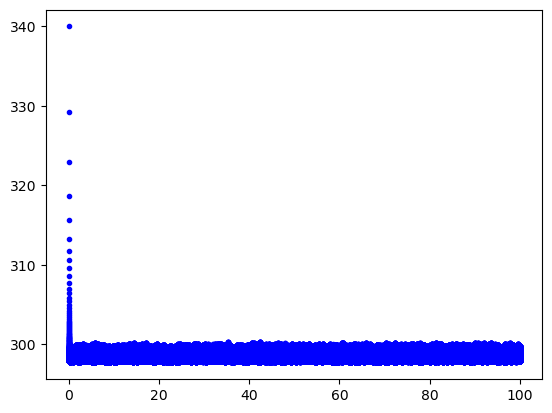

In [11]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

sigma = 5.670374419E-8

emmL = 0.9
emmP = 0.05
emmR = 0.1

rhoAl = 2.71E-6
hcAl = 897
Tamb = 25 + 273.15

volL = 141534
volP = 111683
volR = 157918

saL = 22217
saP = 20873
saR = 24750

radL = 13E-3
radP = 11E-3
radR = 13E-3

massL = rhoAl * volL
massP = rhoAl * volP
massR = rhoAl * volR

TiL = 80 + 273.15
TiP = 80 + 273.15
TiR = 80 + 273.15


def h(T_0, T, r):
    return 1.32 * ((T - T_0) / (2 * r)) ** 1/4


y_0L = [TiL]
carrL = [massL, emmL, saL, radL]
y_0P = [TiP]
carrP = [massP, emmP, saP, radP]
y_0R = [TiR, massR, emmR, saR, radR]


def dydt_arr(t, y_arr, M, e, A, r):
    """Relates the used physical quantities to their differential
    equations for use in the scipy numerical integration function"""

    T = y_arr[0]

    return np.array([(-A * e * sigma * T ** 4 - h(Tamb, T, r) * A * (T - Tamb) + A * e * sigma * Tamb ** 4) / (M * hcAl)])

t_0 = 0.0
t_f = 100.0
steps = int(1E7)
t_arr = np.linspace(t_0, t_f, steps)

sol = integrate.solve_ivp(dydt_arr, (t_0, t_f),
                              y_0L,
                              t_eval=t_arr,
                              args=carrL)

solt = sol['t']
solT = sol['y'][0]

plt.plot(solt, solT, "b.")